# Objectives

### 1. You are provided with the weekly sales data for their various outlets. Use statistical
### analysis, EDA, outlier analysis, and handle the missing values to come up with various
### insights that can give them a clear perspective on the following:
* a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
* b. If the weekly sales show a seasonal trend, when and what could be the reason?
* c. Does temperature affect the weekly sales in any manner?
* d. How is the Consumer Price index affecting the weekly sales of various stores?
* e. Top performing stores according to the historical data.
* f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

# Loading the dataset

In [3]:
data = pd.read_csv("Walmart DataSet.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# EDA

In [4]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
data['Date'] = pd.to_datetime(data['Date'] , format='mixed')
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [11]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [12]:
data.sort_values('Date', inplace = True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476


In [13]:
data.reset_index(drop = True, inplace = True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476


In [15]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
data.duplicated().sum()

0

### Objective : 1 Starts below

In [17]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

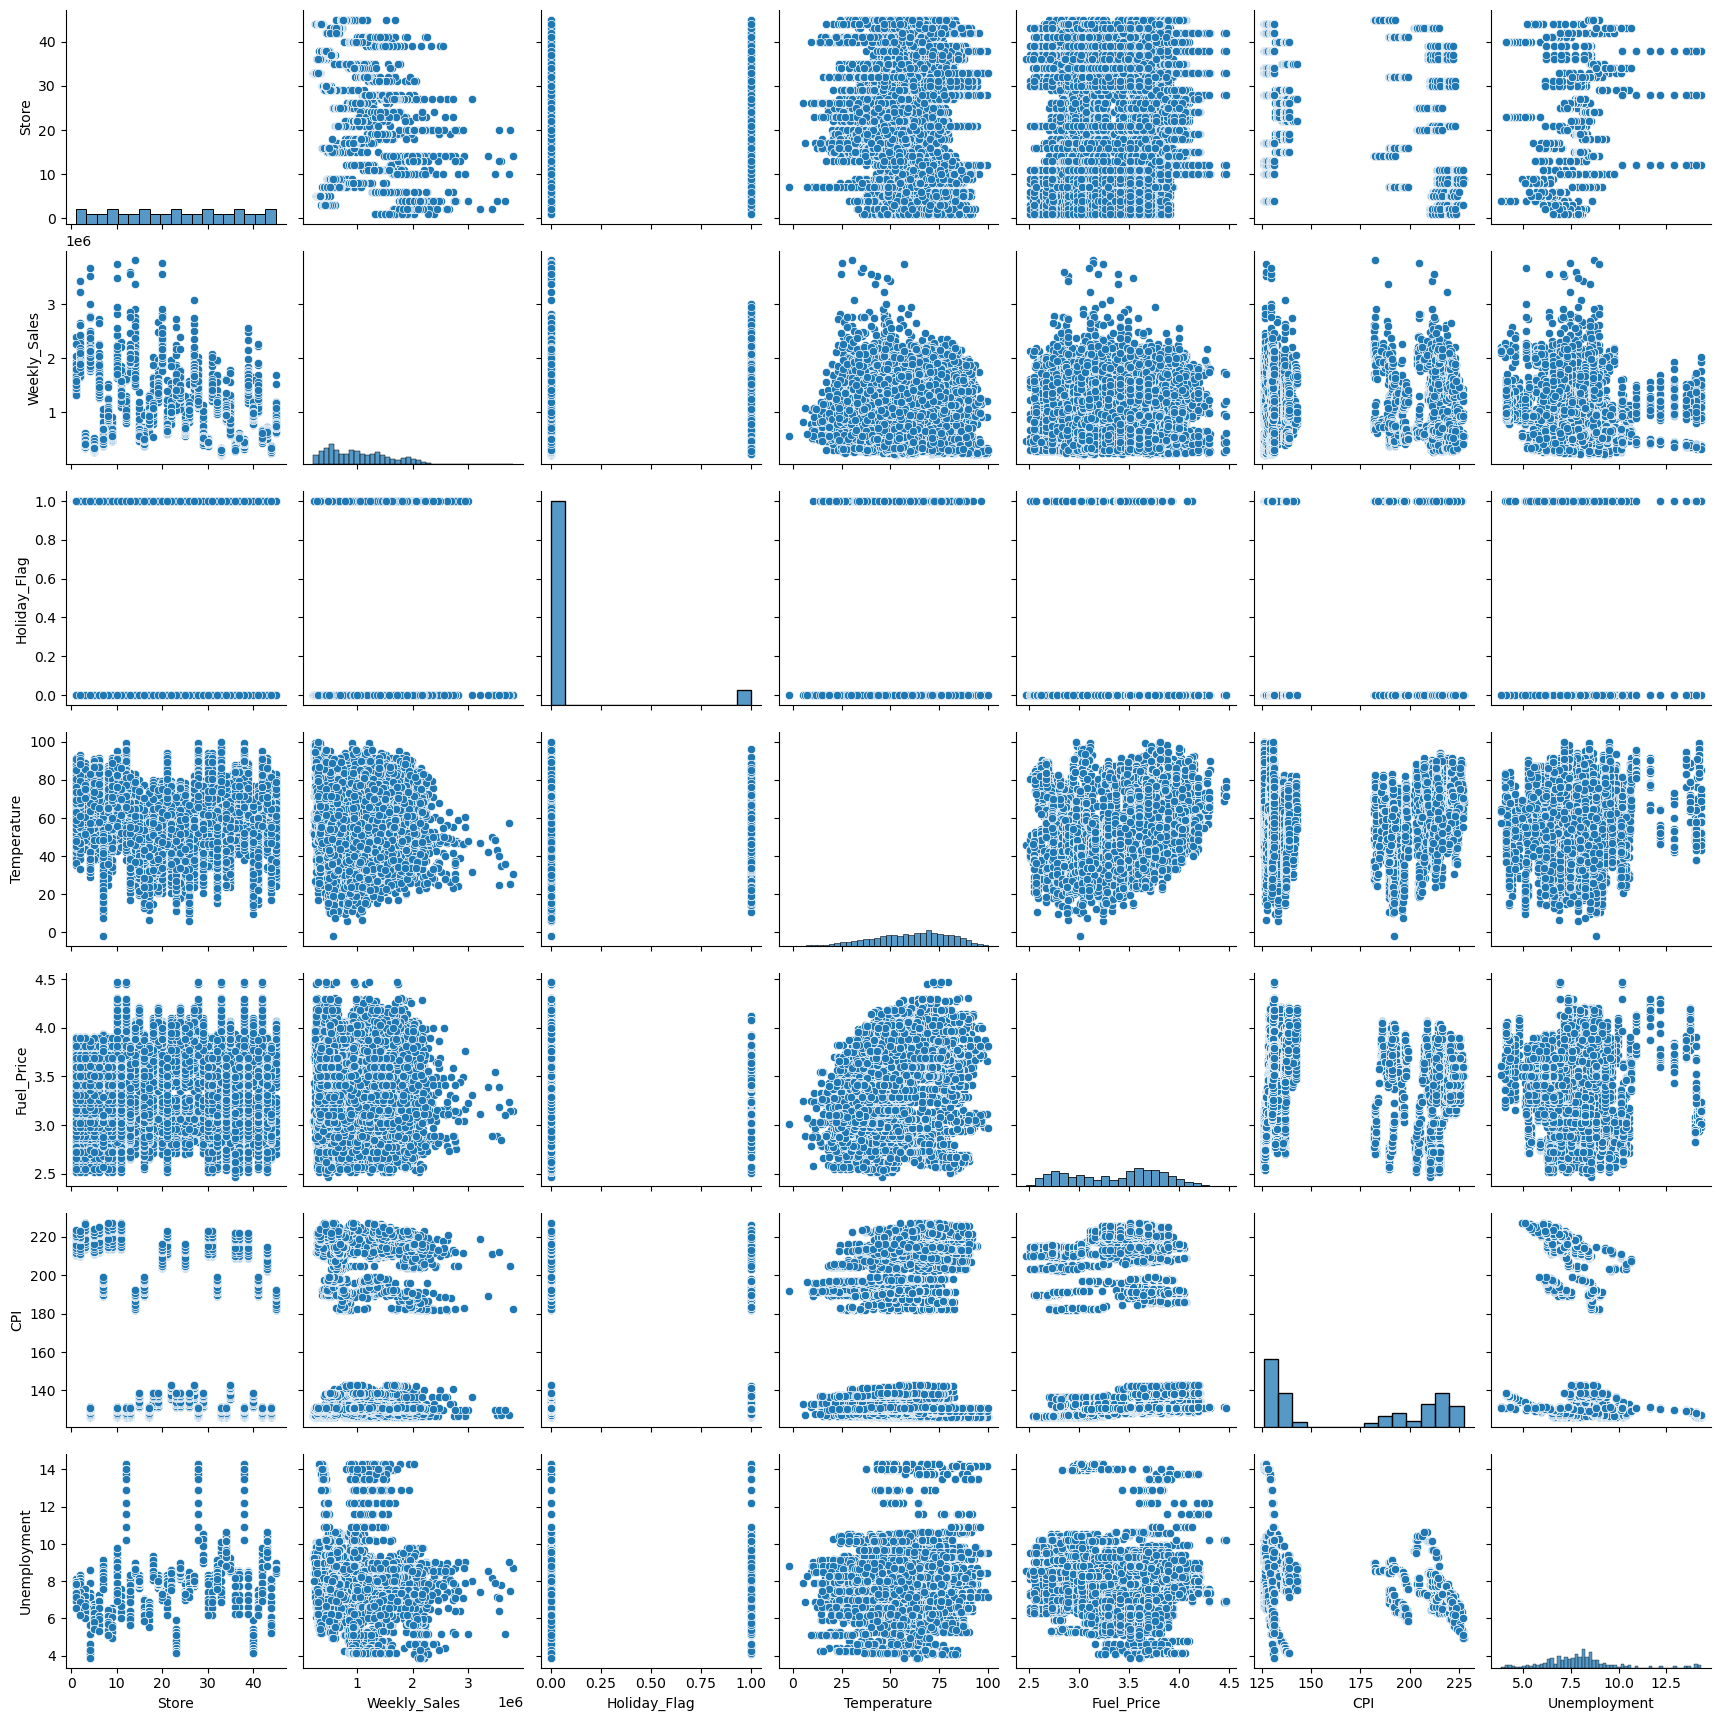

In [18]:
# To see if any pattern exists among the features
sns.pairplot(data)
plt.show()

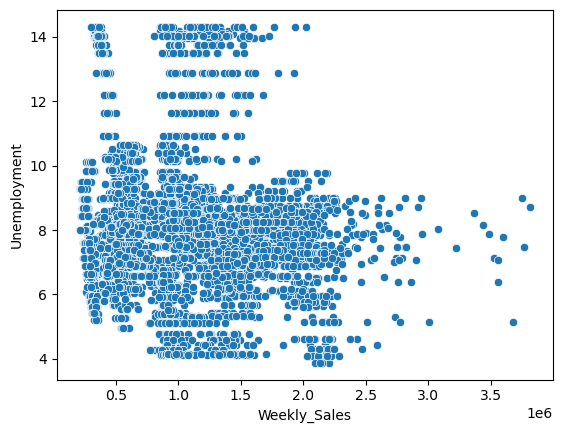

In [19]:
sns.scatterplot(
    data=data,
    x="Weekly_Sales",
    y="Unemployment"
)
plt.show()

In [23]:
data["Weekly_Sales"].corr(data["Unemployment"])

-0.10617608965795426

*As checked in the above scatterplot and correlation being close to 0 , there does not seem to be any linear relationship between Weekly_Sales and Unemployment Rate*

In [24]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [25]:
data = data.set_index('Date')
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-01-10,5,283178.12,0,71.10,2.603,212.226946,6.768
2010-01-10,15,566945.95,0,59.69,2.840,132.756800,8.067
2010-01-10,42,481523.93,0,86.01,3.001,126.234600,9.003
2010-01-10,33,224294.39,0,91.45,3.001,126.234600,9.265
2010-01-10,36,422169.47,0,74.66,2.567,210.440443,8.476


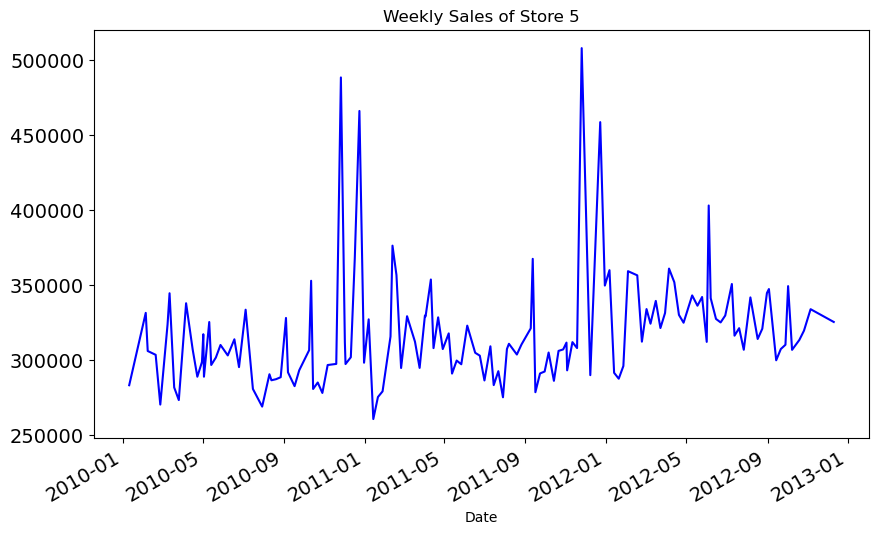

In [53]:
data[data["Store"]==5]["Weekly_Sales"].plot(figsize=(10,6), title= 'Weekly Sales of Store 5', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

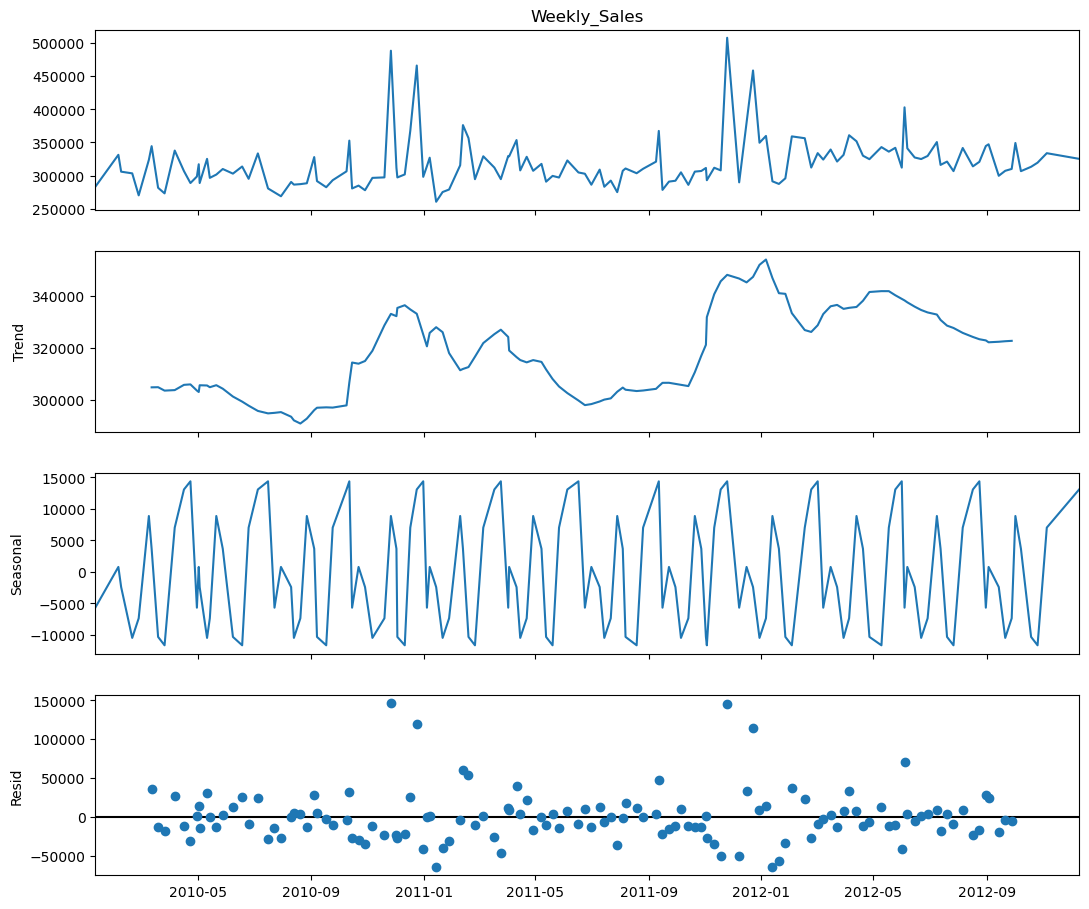

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculating seasonal trends for Store 5 only
decomposition = seasonal_decompose(data[data["Store"]==5]["Weekly_Sales"], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [26]:
# c. Does temperature affect the weekly sales in any manner?

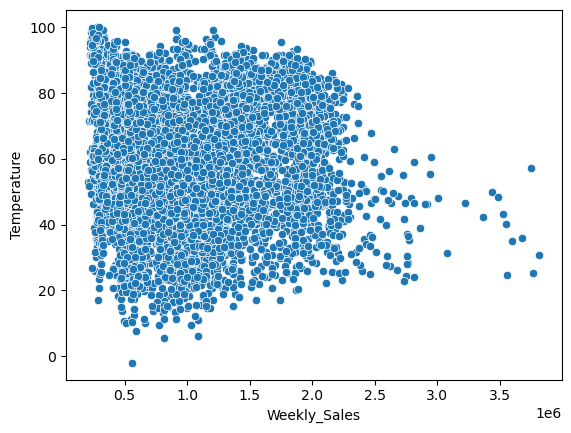

In [28]:
sns.scatterplot(
    data=data,
    x="Weekly_Sales",
    y="Temperature"
)
plt.show()

In [29]:
data["Weekly_Sales"].corr(data["Temperature"])

-0.06381001317946956

*As checked in the above scatterplot and correlation being close to 0 , there does not seem to be any linear relationship between Weekly_Sales and Temperature*

In [30]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?

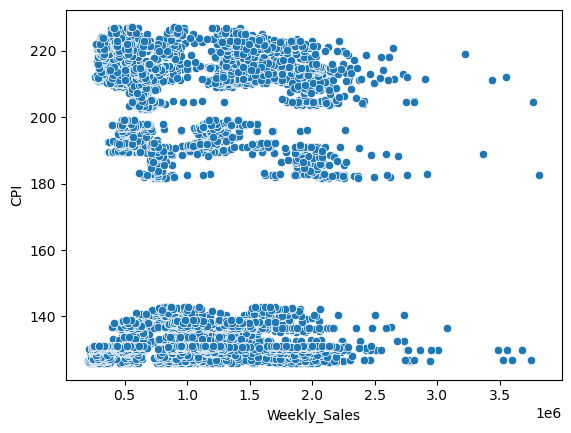

In [31]:
sns.scatterplot(
    data=data,
    x="Weekly_Sales",
    y="CPI"
)
plt.show()

In [32]:
data["Weekly_Sales"].corr(data["CPI"])

-0.07263416204017627

In [37]:
data_2 = data.groupby(["Store"])[["Weekly_Sales","CPI"]].sum()

In [38]:
data_2["Weekly_Sales"].corr(data_2["CPI"])

-0.0765688607113642

*As checked in the above scatterplot and correlation being close to 0 , there does not seem to be any linear relationship between Weekly_Sales and CPI*

In [41]:
# e. Top performing stores according to the historical data.
data_3 = data.groupby(["Store"])[["Weekly_Sales"]].sum()
data_3.head()

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07


In [42]:
data_3[data_3["Weekly_Sales"] == data_3["Weekly_Sales"].max()]

,Weekly_Sales
Store,
20,3.013978e+08


*Store 20 is the Top performing store*

In [43]:
# f. The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.

data_3[data_3["Weekly_Sales"] == data_3["Weekly_Sales"].min()]

,Weekly_Sales
Store,
33,37160221.96


*Store 33 is the Worst performing store*

In [49]:
data_3.loc[20] - data_3.loc[33]

Weekly_Sales    264237570.5
dtype: float64

*264237570.5 is the difference between top and worst performing stores*

### Objective :2 Starts below

In [70]:
store_1 = data[data["Store"]==1][["Weekly_Sales"]]
store_1.shape

(143, 1)

In [71]:
store_3 = data[data["Store"]==3][["Weekly_Sales"]]
store_3.shape

(143, 1)

In [72]:
store_5 = data[data["Store"]==5][["Weekly_Sales"]]
store_5.shape

(143, 1)

In [73]:
store_7 = data[data["Store"]==7][["Weekly_Sales"]]
store_7.shape

(143, 1)

In [74]:
store_9 = data[data["Store"]==9][["Weekly_Sales"]]
store_9.shape

(143, 1)

### Creating train and test data for the above 5 stores

In [75]:
store_1_train = store_1[:101]
store_1_test = store_1[101:]

In [76]:
store_3_train = store_3[:101]
store_3_test = store_3[101:]

In [77]:
store_5_train = store_5[:101]
store_5_test = store_5[101:]

In [78]:
store_7_train = store_7[:101]
store_7_test = store_7[101:]

In [79]:
store_9_train = store_9[:101]
store_9_test = store_9[101:]

In [100]:
store_9_train.head()

,Weekly_Sales
Date,
2010-01-10,495692.19
2010-02-04,545206.32
2010-02-07,528832.54
2010-02-19,511327.90
2010-02-26,473773.27


In [101]:
store_9_test.head()

,Weekly_Sales
Date,
2012-01-13,474964.60
2012-01-20,480130.04
2012-01-27,482451.21
2012-02-03,619498.28
2012-02-17,658965.05


### Perform ADF hypothesis test to confirm if series is stationary or not

In [82]:
from statsmodels.tsa.stattools import adfuller

ADF test is conducted with the following assumptions:

* Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
* Alternate Hypothesis(HA): Series is stationary, or series has no unit root

Considering alpha = 0.05

In [84]:
result = adfuller(store_1["Weekly_Sales"])
result[1]

1.6220430277549411e-12

In [85]:
result = adfuller(store_3["Weekly_Sales"])
result[1]

7.219753620366216e-16

In [86]:
result = adfuller(store_5["Weekly_Sales"])
result[1]

1.6274578377254565e-17

In [87]:
result = adfuller(store_7["Weekly_Sales"])
result[1]

9.305842097801254e-11

In [88]:
result = adfuller(store_9["Weekly_Sales"])
result[1]

5.323110958603515e-16

### From above results we reject the NULL Hypothesis (Ho), since p-values < 0.05 and conclude that series is stationary.

## Building a model to forecast the Weekly_Sales

In [91]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

In [108]:
arima_model = ARIMA(store_1_train, order = (1, 1, 1))
arima_model = arima_model.fit()

In [109]:
# Obtain predictions from the AR model for the testing data indices
train_len = 101
ar_model_preds = arima_model.predict(start = train_len, end = len(store_1)-1)

test_dates = store_1.index[train_len:]  # Adjust to match your `train_len`

# Update the index of the predictions to match the dates
ar_model_preds.index = test_dates

ar_model_preds

Date
2012-01-13    1.632662e+06
2012-01-20    1.635695e+06
2012-01-27    1.636818e+06
2012-02-03    1.637234e+06
2012-02-17    1.637388e+06
2012-02-24    1.637446e+06
2012-03-02    1.637467e+06
2012-03-08    1.637475e+06
2012-03-16    1.637477e+06
2012-03-23    1.637479e+06
2012-03-30    1.637479e+06
2012-04-05    1.637479e+06
2012-04-13    1.637479e+06
2012-04-20    1.637479e+06
2012-04-27    1.637479e+06
2012-05-10    1.637479e+06
2012-05-18    1.637479e+06
2012-05-25    1.637479e+06
2012-06-01    1.637479e+06
2012-06-04    1.637479e+06
2012-06-07    1.637479e+06
2012-06-15    1.637479e+06
2012-06-22    1.637479e+06
2012-06-29    1.637479e+06
2012-07-09    1.637479e+06
2012-07-13    1.637479e+06
2012-07-20    1.637479e+06
2012-07-27    1.637479e+06
2012-08-06    1.637479e+06
2012-08-17    1.637479e+06
2012-08-24    1.637479e+06
2012-08-31    1.637479e+06
2012-09-03    1.637479e+06
2012-09-14    1.637479e+06
2012-09-21    1.637479e+06
2012-09-28    1.637479e+06
2012-10-02    1.637479e

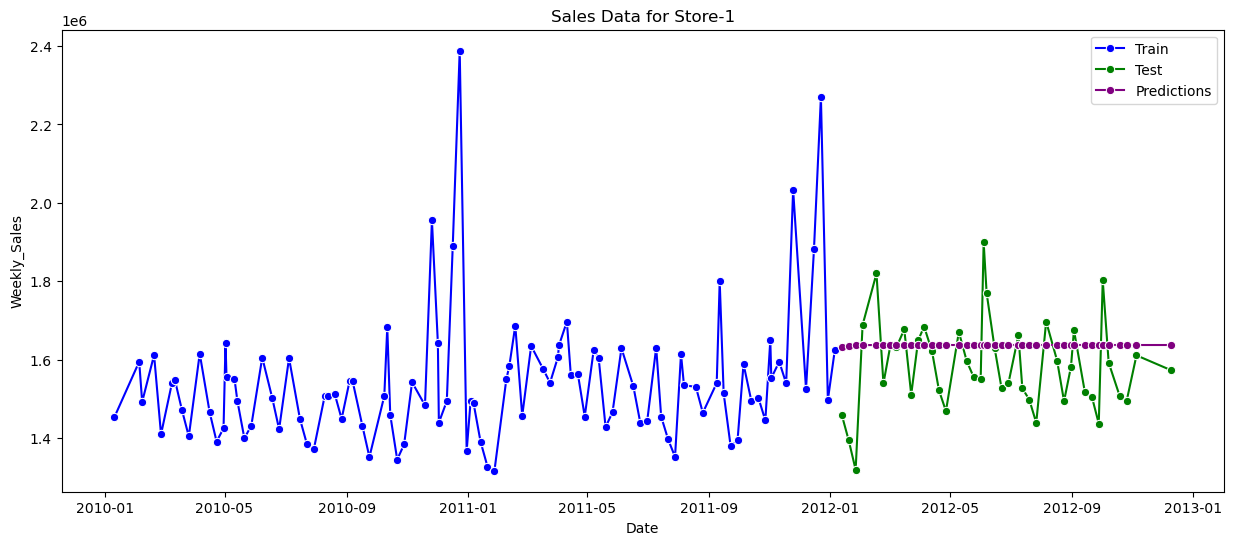

In [110]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (15, 6))
sns.lineplot(data = store_1_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store_1_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
#sns.lineplot(x = 'Date', y = ar_model_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
sns.lineplot(x=ar_model_preds.index, y=ar_model_preds.values, marker='o', color='purple', label='Predictions')
plt.title('Sales Data for Store-1');

In [111]:
# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

In [134]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store_1_test['Weekly_Sales'], y_pred = ar_model_preds.values))

rmse = np.round(rmse, 2)

performance_df = pd.DataFrame(index = [0],data = {'Store': '1', 'RMSE': rmse})

#performance_df.set_index('Store', inplace = True)

performance_df

,Store,RMSE
0,1,125990.21


In [106]:
#For store 3

In [114]:
arima_model_3 = ARIMA(store_3_train, order = (1, 1, 1))
arima_model_3 = arima_model_3.fit()

In [115]:
# Obtain predictions from the AR model for the testing data indices
#train_len = 101
ar_model_preds_3 = arima_model_3.predict(start = train_len, end = len(store_1)-1)

test_dates_3 = store_3.index[train_len:]  # Adjust to match your `train_len`

# Update the index of the predictions to match the dates
ar_model_preds_3.index = test_dates_3

ar_model_preds_3

Date
2012-01-13    424248.447989
2012-01-20    421307.801972
2012-01-27    420229.583696
2012-02-03    419834.243814
2012-02-17    419689.288357
2012-02-24    419636.138940
2012-03-02    419616.651156
2012-03-08    419609.505759
2012-03-16    419606.885825
2012-03-23    419605.925199
2012-03-30    419605.572976
2012-04-05    419605.443829
2012-04-13    419605.396476
2012-04-20    419605.379114
2012-04-27    419605.372748
2012-05-10    419605.370414
2012-05-18    419605.369558
2012-05-25    419605.369244
2012-06-01    419605.369129
2012-06-04    419605.369087
2012-06-07    419605.369071
2012-06-15    419605.369066
2012-06-22    419605.369064
2012-06-29    419605.369063
2012-07-09    419605.369062
2012-07-13    419605.369062
2012-07-20    419605.369062
2012-07-27    419605.369062
2012-08-06    419605.369062
2012-08-17    419605.369062
2012-08-24    419605.369062
2012-08-31    419605.369062
2012-09-03    419605.369062
2012-09-14    419605.369062
2012-09-21    419605.369062
2012-09-28    4

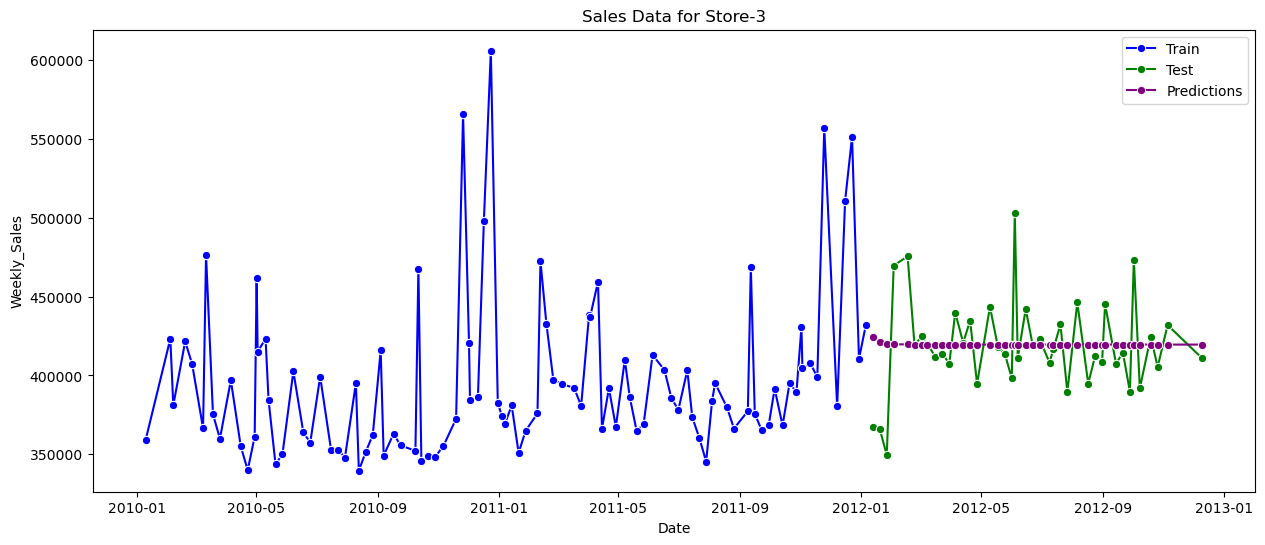

In [116]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (15, 6))
sns.lineplot(data = store_3_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store_3_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x=ar_model_preds_3.index, y=ar_model_preds_3.values, marker='o', color='purple', label='Predictions')
plt.title('Sales Data for Store-3');

In [117]:
rmse = np.sqrt(mean_squared_error(y_true = store_3_test['Weekly_Sales'], y_pred = ar_model_preds_3.values))

rmse = np.round(rmse, 2)

performance_df_3 = pd.DataFrame(index = [0],data = {'Store': '3', 'RMSE': rmse})

performance_df_3

,Store,RMSE
0,3,29129.7


In [118]:
# For store - 5

In [119]:
arima_model_5 = ARIMA(store_5_train, order = (1, 1, 1))
arima_model_5 = arima_model_5.fit()

In [120]:
# Obtain predictions from the AR model for the testing data indices

ar_model_preds_5 = arima_model_5.predict(start = train_len, end = len(store_1)-1)

test_dates_5 = store_5.index[train_len:]  # Adjust to match your `train_len`

# Update the index of the predictions to match the dates
ar_model_preds_5.index = test_dates_5

ar_model_preds_5

Date
2012-01-13    353677.463954
2012-01-20    352506.039888
2012-01-27    352284.366246
2012-02-03    352242.417983
2012-02-17    352234.479932
2012-02-24    352232.977780
2012-03-02    352232.693522
2012-03-08    352232.639730
2012-03-16    352232.629551
2012-03-23    352232.627625
2012-03-30    352232.627260
2012-04-05    352232.627191
2012-04-13    352232.627178
2012-04-20    352232.627176
2012-04-27    352232.627175
2012-05-10    352232.627175
2012-05-18    352232.627175
2012-05-25    352232.627175
2012-06-01    352232.627175
2012-06-04    352232.627175
2012-06-07    352232.627175
2012-06-15    352232.627175
2012-06-22    352232.627175
2012-06-29    352232.627175
2012-07-09    352232.627175
2012-07-13    352232.627175
2012-07-20    352232.627175
2012-07-27    352232.627175
2012-08-06    352232.627175
2012-08-17    352232.627175
2012-08-24    352232.627175
2012-08-31    352232.627175
2012-09-03    352232.627175
2012-09-14    352232.627175
2012-09-21    352232.627175
2012-09-28    3

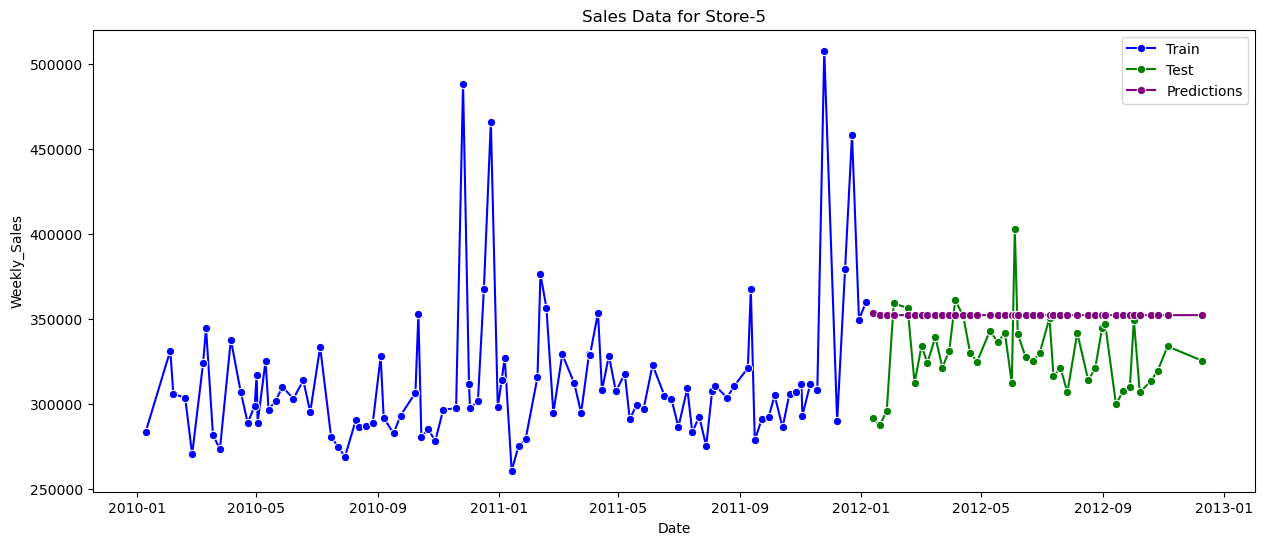

In [121]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (15, 6))
sns.lineplot(data = store_5_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store_5_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x=ar_model_preds_5.index, y=ar_model_preds_5.values, marker='o', color='purple', label='Predictions')
plt.title('Sales Data for Store-5');

In [122]:
rmse = np.sqrt(mean_squared_error(y_true = store_5_test['Weekly_Sales'], y_pred = ar_model_preds_5.values))

rmse = np.round(rmse, 2)

performance_df_5 = pd.DataFrame(index = [0],data = {'Store': '5', 'RMSE': rmse})

performance_df_5

,Store,RMSE
0,5,31912.01


In [123]:
#For store - 7

In [124]:
arima_model_7 = ARIMA(store_7_train, order = (1, 1, 1))
arima_model_7 = arima_model_7.fit()

In [125]:
# Obtain predictions from the AR model for the testing data indices

ar_model_preds_7 = arima_model_7.predict(start = train_len, end = len(store_1)-1)

test_dates_7 = store_7.index[train_len:]  # Adjust to match your `train_len`

# Update the index of the predictions to match the dates
ar_model_preds_7.index = test_dates_7

ar_model_preds_7

Date
2012-01-13    640194.907064
2012-01-20    654311.400657
2012-01-27    659090.199964
2012-02-03    660707.947506
2012-02-17    661255.597018
2012-02-24    661440.990586
2012-03-02    661503.751118
2012-03-08    661524.997186
2012-03-16    661532.189532
2012-03-23    661534.624327
2012-03-30    661535.448568
2012-04-05    661535.727596
2012-04-13    661535.822053
2012-04-20    661535.854030
2012-04-27    661535.864855
2012-05-10    661535.868519
2012-05-18    661535.869760
2012-05-25    661535.870180
2012-06-01    661535.870322
2012-06-04    661535.870370
2012-06-07    661535.870386
2012-06-15    661535.870392
2012-06-22    661535.870394
2012-06-29    661535.870394
2012-07-09    661535.870395
2012-07-13    661535.870395
2012-07-20    661535.870395
2012-07-27    661535.870395
2012-08-06    661535.870395
2012-08-17    661535.870395
2012-08-24    661535.870395
2012-08-31    661535.870395
2012-09-03    661535.870395
2012-09-14    661535.870395
2012-09-21    661535.870395
2012-09-28    6

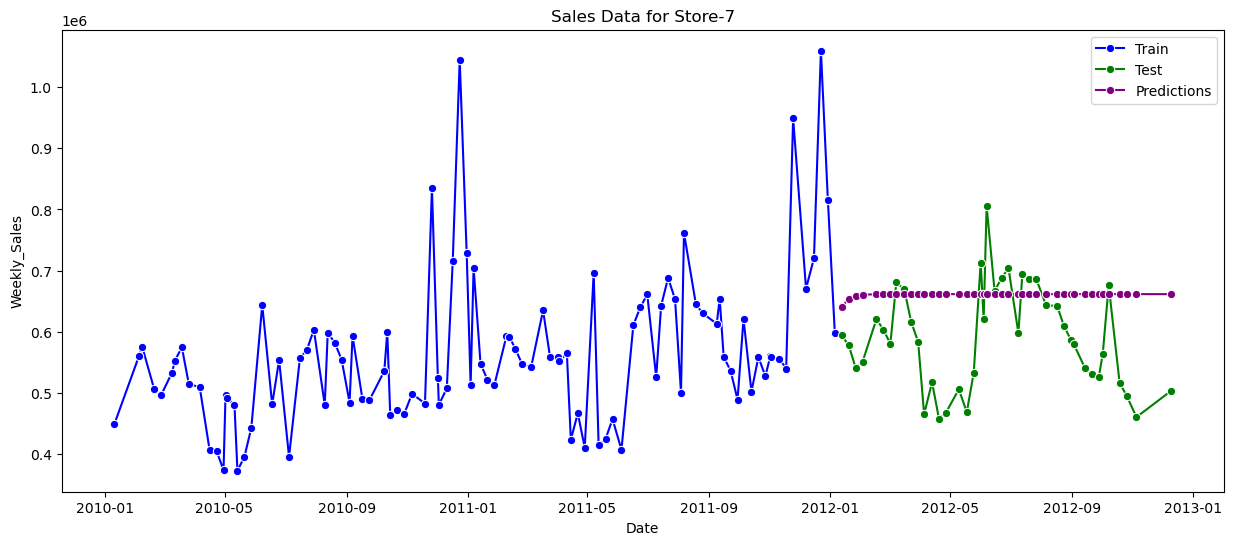

In [126]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (15, 6))
sns.lineplot(data = store_7_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store_7_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x=ar_model_preds_7.index, y=ar_model_preds_7.values, marker='o', color='purple', label='Predictions')
plt.title('Sales Data for Store-7');


In [127]:
rmse = np.sqrt(mean_squared_error(y_true = store_7_test['Weekly_Sales'], y_pred = ar_model_preds_7.values))

rmse = np.round(rmse, 2)

performance_df_7 = pd.DataFrame(index = [0],data = {'Store': '7', 'RMSE': rmse})

performance_df_7

,Store,RMSE
0,7,108514.5


In [128]:
# For store - 9

In [129]:
arima_model_9 = ARIMA(store_9_train, order = (1, 1, 1))
arima_model_9 = arima_model_9.fit()

In [130]:
# Obtain predictions from the AR model for the testing data indices

ar_model_preds_9 = arima_model_9.predict(start = train_len, end = len(store_1)-1)

test_dates_9 = store_9.index[train_len:]  # Adjust to match your `train_len`

# Update the index of the predictions to match the dates
ar_model_preds_9.index = test_dates_9

ar_model_preds_9

Date
2012-01-13    603598.036366
2012-01-20    607875.078252
2012-01-27    608792.050430
2012-02-03    608988.643776
2012-02-17    609030.792213
2012-02-24    609039.828586
2012-03-02    609041.765930
2012-03-08    609042.181285
2012-03-16    609042.270334
2012-03-23    609042.289426
2012-03-30    609042.293519
2012-04-05    609042.294397
2012-04-13    609042.294585
2012-04-20    609042.294625
2012-04-27    609042.294634
2012-05-10    609042.294636
2012-05-18    609042.294636
2012-05-25    609042.294636
2012-06-01    609042.294636
2012-06-04    609042.294636
2012-06-07    609042.294636
2012-06-15    609042.294636
2012-06-22    609042.294636
2012-06-29    609042.294636
2012-07-09    609042.294636
2012-07-13    609042.294636
2012-07-20    609042.294636
2012-07-27    609042.294636
2012-08-06    609042.294636
2012-08-17    609042.294636
2012-08-24    609042.294636
2012-08-31    609042.294636
2012-09-03    609042.294636
2012-09-14    609042.294636
2012-09-21    609042.294636
2012-09-28    6

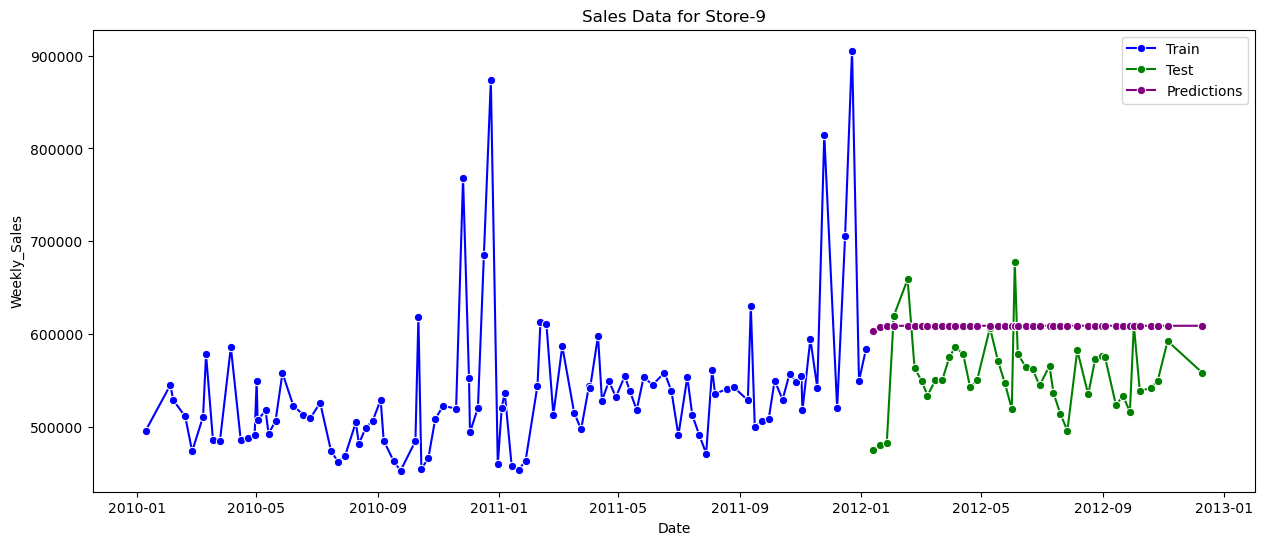

In [131]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (15, 6))
sns.lineplot(data = store_9_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store_9_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x=ar_model_preds_9.index, y=ar_model_preds_9.values, marker='o', color='purple', label='Predictions')
plt.title('Sales Data for Store-9');

In [132]:
rmse = np.sqrt(mean_squared_error(y_true = store_9_test['Weekly_Sales'], y_pred = ar_model_preds_9.values))

rmse = np.round(rmse, 2)

performance_df_9 = pd.DataFrame(index = [0],data = {'Store': '9', 'RMSE': rmse})

performance_df_9

,Store,RMSE
0,9,66025.0


In [136]:
result = pd.concat([performance_df,performance_df_3,performance_df_5,performance_df_7,performance_df_9],axis=0)
result.reset_index(inplace=True , drop=True)
result

,Store,RMSE
0,1,125990.21
1,3,29129.70
2,5,31912.01
3,7,108514.50
4,9,66025.00
